PREDICTING A PULSAR STAR Dr Robert Lyon  HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .  Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .  As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.  Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.  Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.  The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.  Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).  Attribute Information: Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:  Mean of the integrated profile. Standard deviation of the integrated profile. Excess kurtosis of the integrated profile. Skewness of the integrated profile. Mean of the DM-SNR curve. Standard deviation of the DM-SNR curve. Excess kurtosis of the DM-SNR curve. Skewness of the DM-SNR curve. Class HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
#reading the dataset
df= pd.read_csv('pulsar_stars.csv')

In [3]:
df.shape

(17898, 9)

In [4]:
df.isna()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
17893,False,False,False,False,False,False,False,False,False
17894,False,False,False,False,False,False,False,False,False
17895,False,False,False,False,False,False,False,False,False
17896,False,False,False,False,False,False,False,False,False


In [5]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Data Visualization

## Univariate Analysis

### Mean of the integrated profile

In [7]:
df[' Mean of the integrated profile'].describe()

count    17898.000000
mean       111.079968
std         25.652935
min          5.812500
25%        100.929688
50%        115.078125
75%        127.085938
max        192.617188
Name:  Mean of the integrated profile, dtype: float64

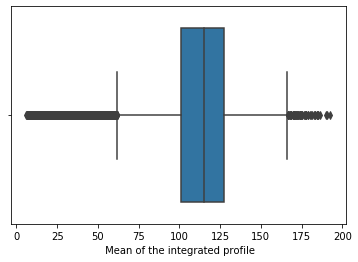

In [8]:
sns.boxplot(df[' Mean of the integrated profile'])

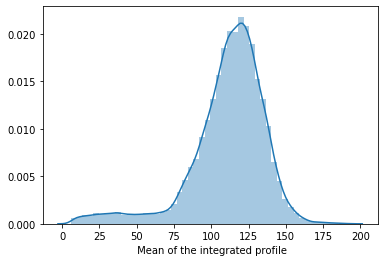

In [9]:
sns.distplot(df[' Mean of the integrated profile'])

### Standard deviation of the integrated profile

In [10]:
df[' Standard deviation of the integrated profile'].describe()

count    17898.000000
mean        46.549532
std          6.843189
min         24.772042
25%         42.376018
50%         46.947479
75%         51.023202
max         98.778911
Name:  Standard deviation of the integrated profile, dtype: float64

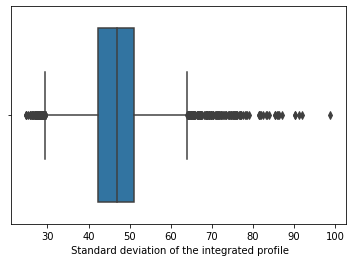

In [11]:
sns.boxplot(df[' Standard deviation of the integrated profile'])

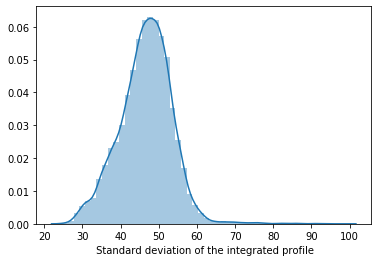

In [12]:
sns.distplot(df[' Standard deviation of the integrated profile'])

### Excess kurtosis of the integrated profile

In [13]:
df[' Excess kurtosis of the integrated profile'].describe()

count    17898.000000
mean         0.477857
std          1.064040
min         -1.876011
25%          0.027098
50%          0.223240
75%          0.473325
max          8.069522
Name:  Excess kurtosis of the integrated profile, dtype: float64

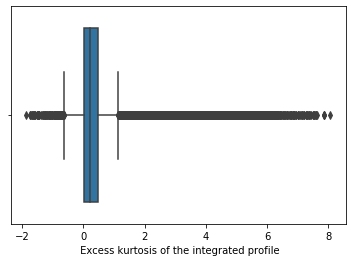

In [14]:
sns.boxplot(df[' Excess kurtosis of the integrated profile'])

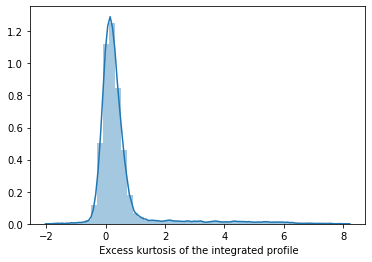

In [15]:
sns.distplot(df[' Excess kurtosis of the integrated profile'])

### Skewness of the integrated profile

In [16]:
df[' Skewness of the integrated profile'].describe()

count    17898.000000
mean         1.770279
std          6.167913
min         -1.791886
25%         -0.188572
50%          0.198710
75%          0.927783
max         68.101622
Name:  Skewness of the integrated profile, dtype: float64

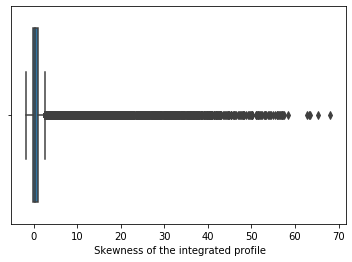

In [17]:
sns.boxplot(df[' Skewness of the integrated profile'])

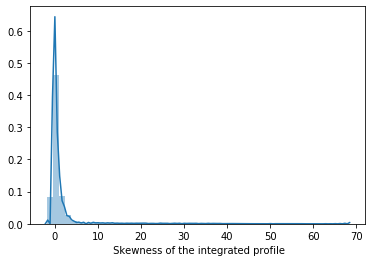

In [18]:
sns.distplot(df[' Skewness of the integrated profile'])

### Mean of the DM-SNR curve

In [19]:
df[' Mean of the DM-SNR curve'].describe()

count    17898.000000
mean        12.614400
std         29.472897
min          0.213211
25%          1.923077
50%          2.801839
75%          5.464256
max        223.392140
Name:  Mean of the DM-SNR curve, dtype: float64

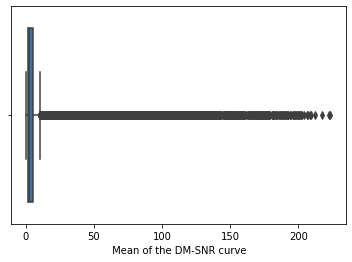

In [20]:
sns.boxplot(df[' Mean of the DM-SNR curve'])

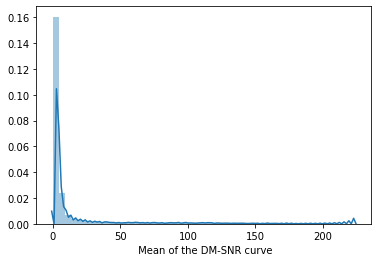

In [21]:
sns.distplot(df[' Mean of the DM-SNR curve'])

### Standard deviation of the DM-SNR curve

In [22]:
df[' Standard deviation of the DM-SNR curve'].describe()

count    17898.000000
mean        26.326515
std         19.470572
min          7.370432
25%         14.437332
50%         18.461316
75%         28.428104
max        110.642211
Name:  Standard deviation of the DM-SNR curve, dtype: float64

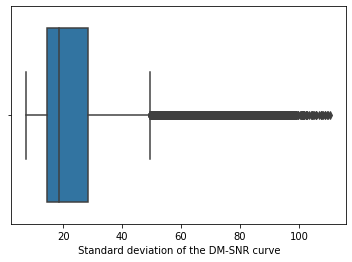

In [23]:
sns.boxplot(df[' Standard deviation of the DM-SNR curve'])

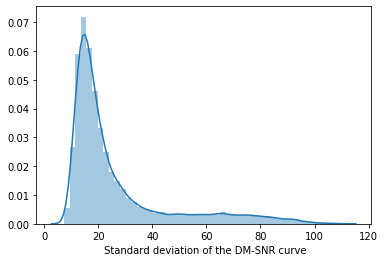

In [24]:
sns.distplot(df[' Standard deviation of the DM-SNR curve'])

### Excess kurtosis of the DM-SNR curve

In [25]:
df[' Excess kurtosis of the DM-SNR curve'].describe()

count    17898.000000
mean         8.303556
std          4.506092
min         -3.139270
25%          5.781506
50%          8.433515
75%         10.702959
max         34.539844
Name:  Excess kurtosis of the DM-SNR curve, dtype: float64

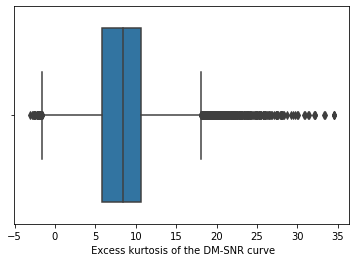

In [26]:
sns.boxplot(df[' Excess kurtosis of the DM-SNR curve'])

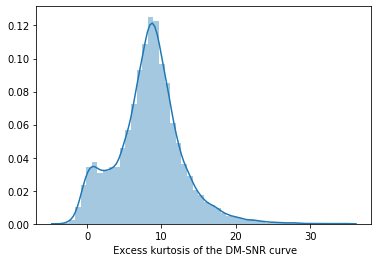

In [27]:
sns.distplot(df[' Excess kurtosis of the DM-SNR curve'])

### Skewness of the DM-SNR curve

In [28]:
df[' Skewness of the DM-SNR curve'].describe()

count    17898.000000
mean       104.857709
std        106.514540
min         -1.976976
25%         34.960504
50%         83.064556
75%        139.309331
max       1191.000837
Name:  Skewness of the DM-SNR curve, dtype: float64

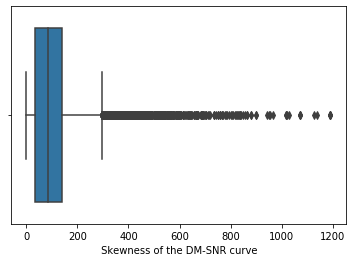

In [29]:
sns.boxplot(df[' Skewness of the DM-SNR curve'])

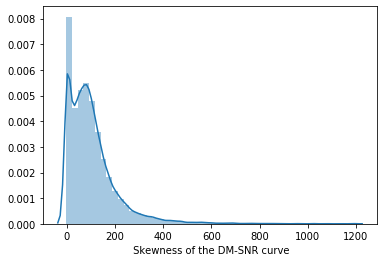

In [30]:
sns.distplot(df[' Skewness of the DM-SNR curve'])

## Bi-Variate Analysis

In [31]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

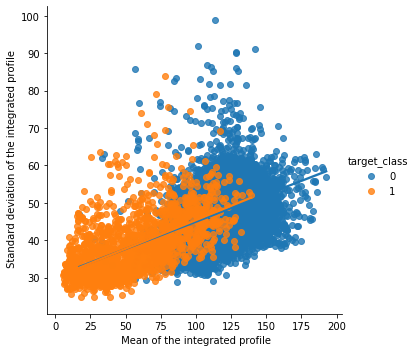

In [32]:
sns.lmplot(x= ' Mean of the integrated profile',y=' Standard deviation of the integrated profile', hue='target_class',data=df)

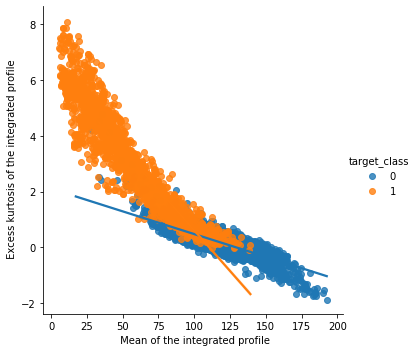

In [33]:
sns.lmplot(x= ' Mean of the integrated profile',y=' Excess kurtosis of the integrated profile', hue='target_class',data=df)

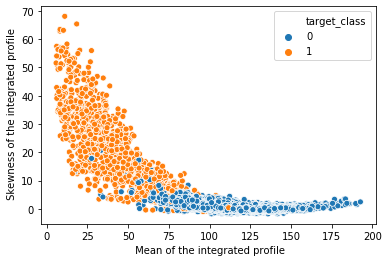

In [34]:
sns.scatterplot(x= ' Mean of the integrated profile', y=' Skewness of the integrated profile', hue= 'target_class', data=df)

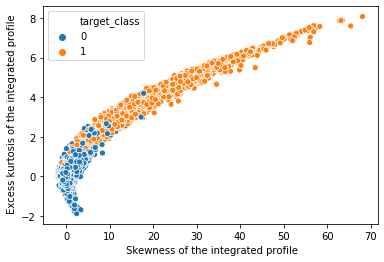

In [35]:
sns.scatterplot(x= ' Skewness of the integrated profile', y= ' Excess kurtosis of the integrated profile', hue= 'target_class', data=df)

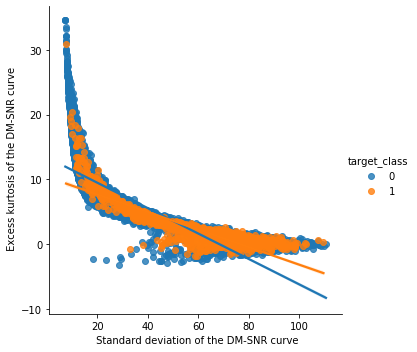

In [36]:
sns.lmplot(x= ' Standard deviation of the DM-SNR curve', y= ' Excess kurtosis of the DM-SNR curve', hue= 'target_class', data=df)

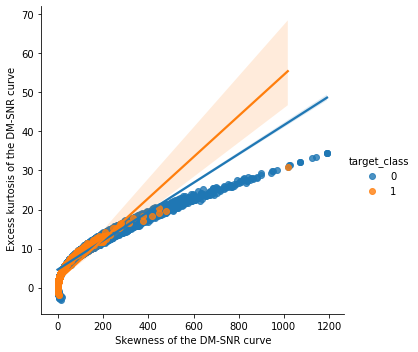

In [37]:
sns.lmplot(x= ' Skewness of the DM-SNR curve', y= ' Excess kurtosis of the DM-SNR curve', hue= 'target_class', data=df)

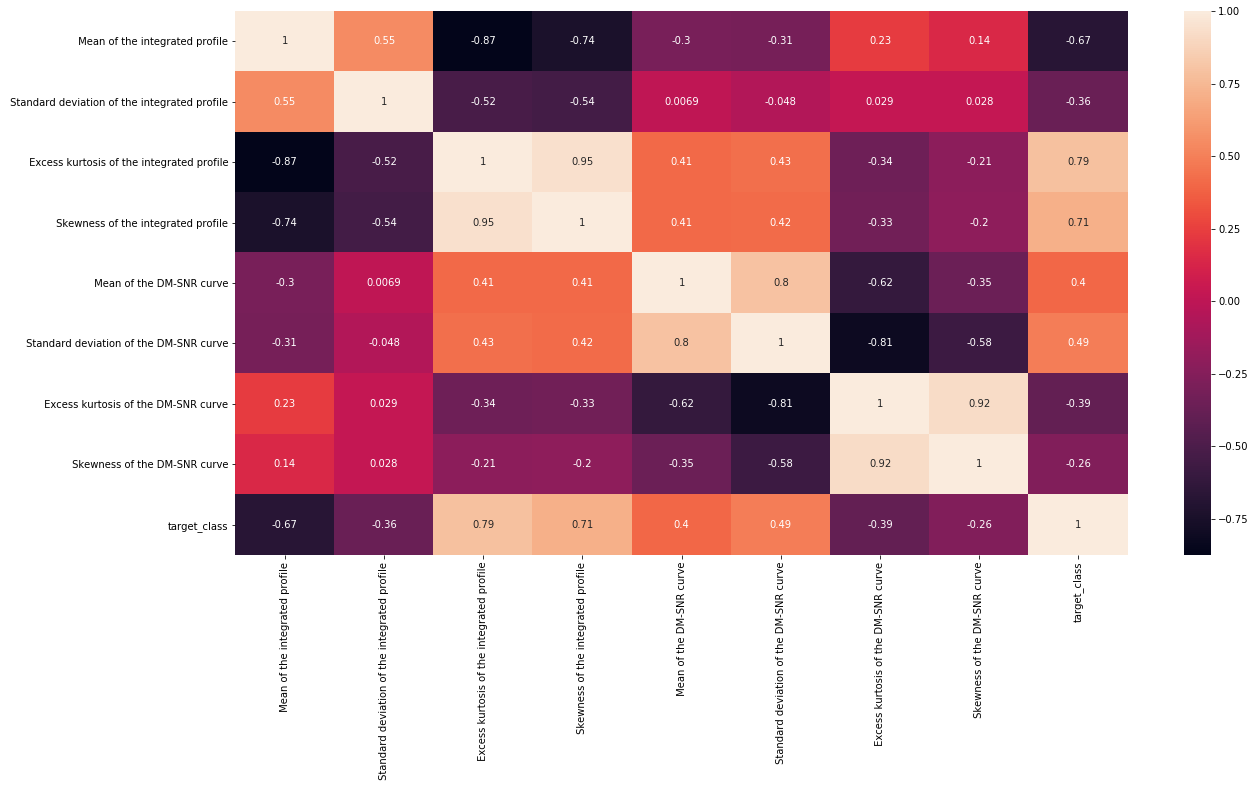

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

# Models

In [39]:
x= df.drop(columns='target_class')
y= df['target_class']

Train test split

In [40]:
from sklearn import model_selection
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model= LogisticRegression()
model.fit(x_train, y_train)

C:\Users\windows\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model.score(x_train, y_train)

0.9786877394636015

In [44]:
y_pred= model.predict(x_test)
score = accuracy_score(y_test,y_pred.round())
print('accuracy_score',score)

accuracy_score 0.9787709497206704


In [45]:
print(metrics.classification_report(y_test, y_pred.round(), digits=2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4900
           1       0.92      0.83      0.87       470

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



# Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model= DecisionTreeClassifier()

In [48]:
model.fit(x_train, y_train), model.score(x_train, y_train)

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 1.0)

In [49]:
y_pred= model.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.9657355679702049


In [50]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4900
           1       0.79      0.82      0.81       470

    accuracy                           0.97      5370
   macro avg       0.89      0.90      0.89      5370
weighted avg       0.97      0.97      0.97      5370



In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc 

0.9004342162396873

In [52]:
# List to store the average RMSE for each value of max_depth:
accuracy = []
max_depth_range = list(range(1, 5))
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)    
    score = clf.score(x_test, y_test)
    accuracy.append(score)
accuracy

[0.9789571694599628,
 0.9789571694599628,
 0.9774674115456239,
 0.9800744878957169]

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RANDOM_STATE = 123

In [55]:
model= RandomForestRegressor(verbose=2, random_state=RANDOM_STATE, oob_score= True, warm_start=True) #, ccp_alpha= non-negative float

In [56]:
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=123, verbose=2, warm_start=True)

In [57]:
print(model.score(x_train, y_train))

y_pred= model.predict(x_test)
score = accuracy_score(y_test,y_pred.round())
print('accuracy_score',score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9714901922940933
accuracy_score 0.9793296089385475


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [58]:
print(metrics.classification_report(y_test, y_pred.round(), digits=2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4900
           1       0.91      0.85      0.88       470

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370



# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [61]:
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))

[[4868   32]
 [ 123  347]]


In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4900
           1       0.92      0.74      0.82       470

    accuracy                           0.97      5370
   macro avg       0.95      0.87      0.90      5370
weighted avg       0.97      0.97      0.97      5370

